<a href="https://colab.research.google.com/github/srivatsan88/End-to-End-Time-Series/blob/master/Multivariate_Time_Series_using_VAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker


import numpy as np
import datetime

from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.api import VAR


mpl.rcParams['figure.figsize'] = (16, 8)
mpl.rcParams['axes.grid'] = False

In [111]:
VN30_df = pd.read_csv('./data/VN30.csv', index_col=0, parse_dates=True)

In [112]:
VN30_df.count()

Price       2635
Open        2635
High        2635
Low         2635
Vol.        2635
Change %    2635
dtype: int64

In [113]:
VN30_df.head(5)

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2012-06-18,510.81,509.62,514.55,508.64,22.57,0.57
2012-06-19,506.67,508.37,510.60,505.02,12.69,-0.81
2012-06-20,508.23,507.23,510.37,504.02,10.66,0.31
2012-06-21,504.71,504.85,507.84,504.52,13.24,-0.69
2012-06-22,500.34,503.97,504.21,499.40,17.35,-0.87


In [114]:
VN30_df.tail(5)

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2022-12-26,987.77,1032.42,1033.17,987.77,175.23,-4.48
2022-12-27,1007.36,988.87,1015.01,985.67,153.66,1.98
2022-12-28,1013.95,1009.19,1023.24,997.12,123.26,0.65
2022-12-29,1008.30,1013.95,1022.15,1008.30,121.03,-0.56
2022-12-30,1005.19,1016.71,1017.45,1005.19,95.62,-0.31


In [115]:
VN30_df.isna().sum()

Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [116]:
VN30_df.dropna(inplace=True)

In [117]:
VN30_df.count()

Price       2635
Open        2635
High        2635
Low         2635
Vol.        2635
Change %    2635
dtype: int64

In [118]:
VN30_df = VN30_df.replace(',','', regex=True)
VN30_df = VN30_df.replace('%','', regex=True)
VN30_df = VN30_df.replace('K','', regex=True)
VN30_df = VN30_df.replace('k','', regex=True)
VN30_df = VN30_df.replace('M','', regex=True)
VN30_df = VN30_df.replace('m','', regex=True)


In [119]:
for col in VN30_df.columns:
    VN30_df[col] = VN30_df[col].astype(np.float32)

In [120]:
VN30_df

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2012-06-18,510.809998,509.619995,514.549988,508.640015,22.570000,0.57
2012-06-19,506.670013,508.369995,510.600006,505.019989,12.690000,-0.81
2012-06-20,508.230011,507.230011,510.369995,504.019989,10.660000,0.31
2012-06-21,504.709991,504.850006,507.839996,504.519989,13.240000,-0.69
2012-06-22,500.339996,503.970001,504.209991,499.399994,17.350000,-0.87
...,...,...,...,...,...,...
2022-12-26,987.770020,1032.420044,1033.170044,987.770020,175.229996,-4.48
2022-12-27,1007.359985,988.869995,1015.010010,985.669983,153.660004,1.98
2022-12-28,1013.950012,1009.190002,1023.239990,997.119995,123.260002,0.65


In [121]:
VN30_df.columns

Index(['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

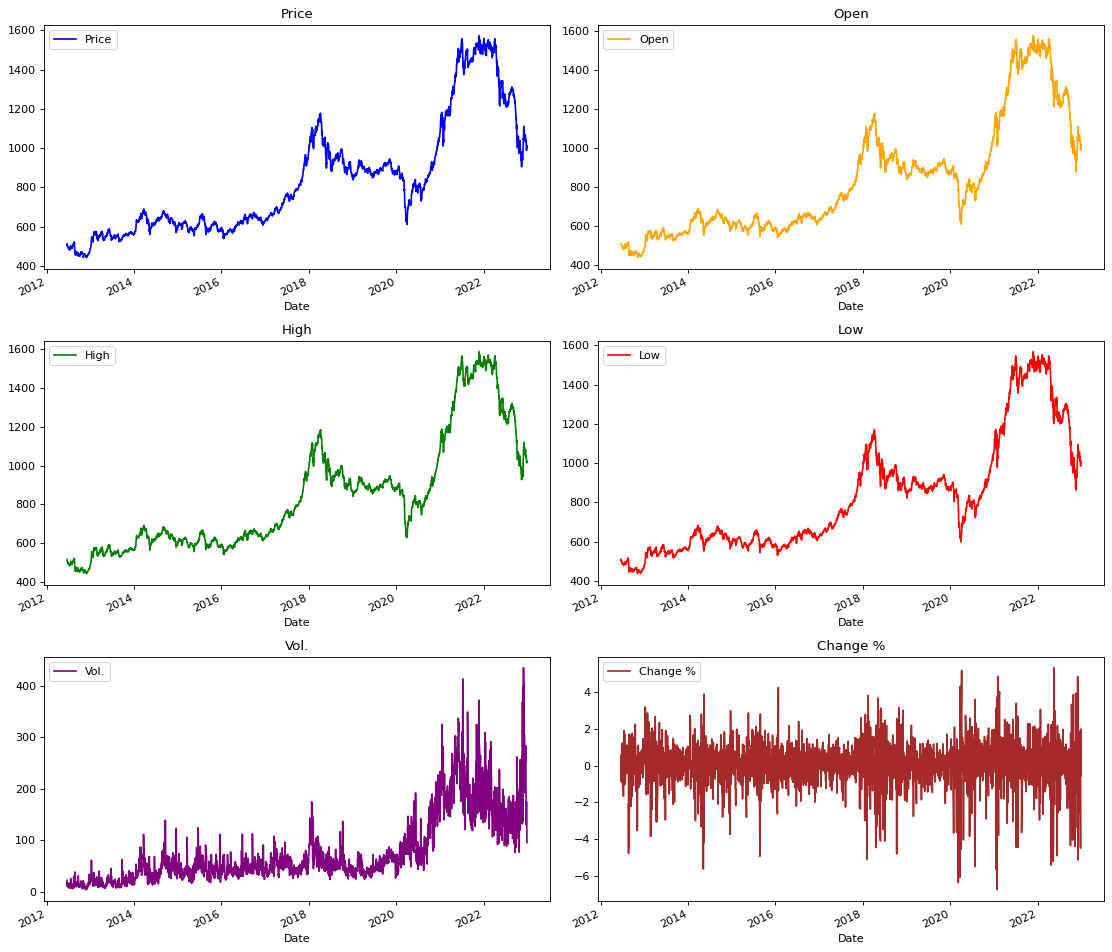

In [122]:
color_list = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
]


def Visualize(data):
    features= list(data.select_dtypes(include=[np.number]).columns.values)
    feature_size=len(features)
    fig, axes = plt.subplots(
        nrows=int(np.ceil(feature_size/2)), ncols=2, figsize=(14, feature_size*2), dpi=80, facecolor="w", edgecolor="k"
    )
    # print('feature size ', feature_size)
    for i in range(feature_size):
        key = features[i]
        c = color_list[i % (len(color_list))]
        t_data = data[key]
        t_data.head()
        # print(i//2, i%2)
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{}".format(key),
            rot=25,
        )
        ax.legend([key])
    plt.tight_layout()


Visualize(VN30_df)

In [123]:
VN30_df.index

DatetimeIndex(['2012-06-18', '2012-06-19', '2012-06-20', '2012-06-21',
               '2012-06-22', '2012-06-25', '2012-06-26', '2012-06-27',
               '2012-06-28', '2012-06-29',
               ...
               '2022-12-19', '2022-12-20', '2022-12-21', '2022-12-22',
               '2022-12-23', '2022-12-26', '2022-12-27', '2022-12-28',
               '2022-12-29', '2022-12-30'],
              dtype='datetime64[ns]', name='Date', length=2635, freq=None)

<Axes: xlabel='Date'>

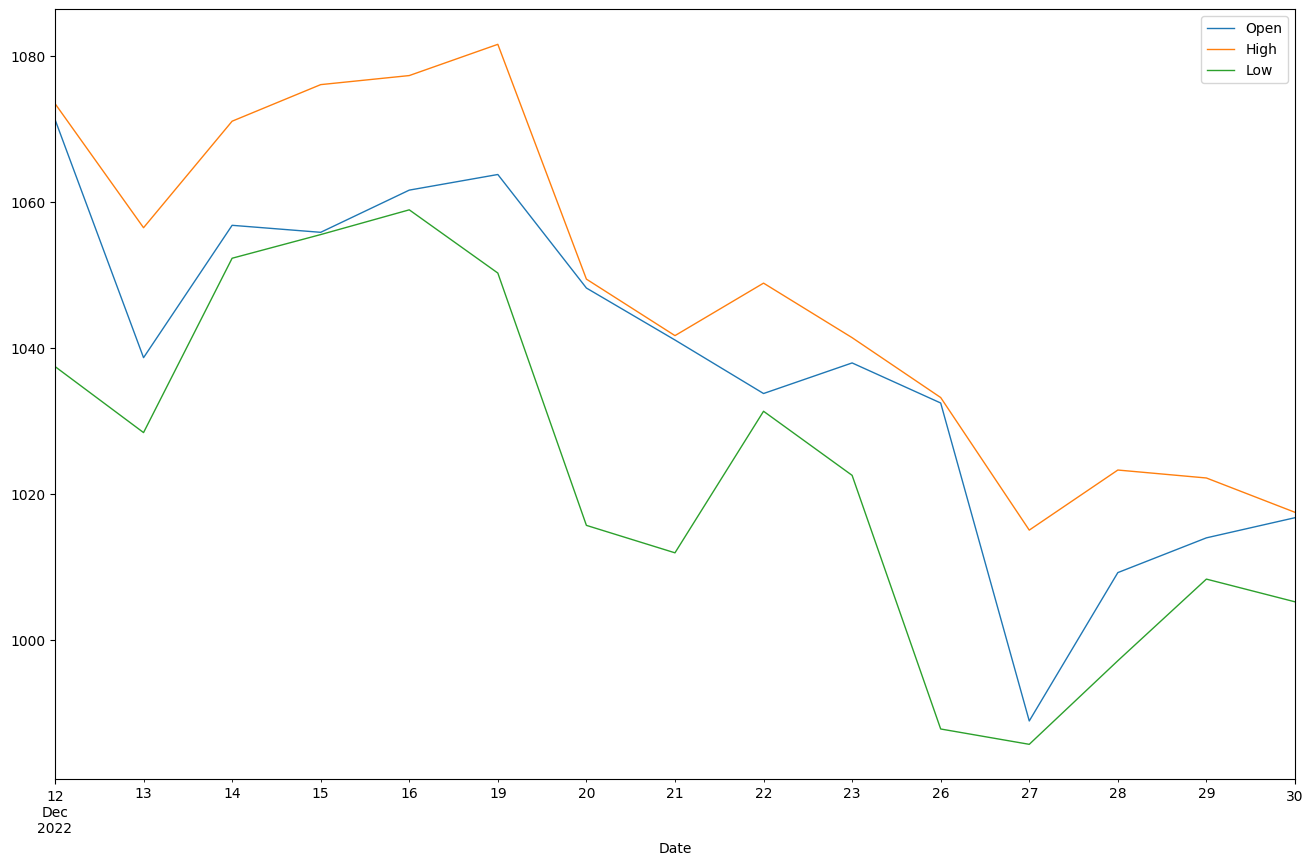

In [124]:
VN30_df[['Open','High','Low']][-15:].plot(figsize=(16, 10), linewidth=1)

Null Hypothesis - Series possesses a unit root and hence is not stationary

Alternate Hypothesis - Series is stationary

In [125]:
def check_stationary(df):
  for i in range(len(df.columns)):
    print(f'============Testing stationary for {df.columns[i]} series ==========')
    result = adfuller(df[df.columns[i]], autolag="AIC")
    print('ADF Statistic: %d' % result[0])
    print('p-value: %f' % result[1])
    print('number of lag %f' % result[2])
    print('Critical Values:')
    for key, value in result[4].items():
      print('\t%s: %.3f' % (key, value))
    
    print(result[1])
    if result[1] > 0.05 :
      print('===> {} - Series is not Stationary'.format(df.columns[i]))
    else:
      print('{} - Series is Stationary'.format(df.columns[i]))

In [126]:
copy_df = VN30_df.copy()

In [127]:
origin_df = VN30_df.copy()

In [128]:
for i in range(len(copy_df.columns)):
    result = adfuller(copy_df[copy_df.columns[i]])
    if result[1] > 0.05 :
        copy_df[copy_df.columns[i]] = copy_df[copy_df.columns[i]] - copy_df[copy_df.columns[i]].shift(1)
            # copy_df.fillna(method='ffill', inplace=True)
copy_df.dropna(inplace=True)

In [129]:
copy_df

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2012-06-19,-4.139984,-1.250000,-3.949982,-3.620026,-9.880000,-0.81
2012-06-20,1.559998,-1.139984,-0.230011,-1.000000,-2.030000,0.31
2012-06-21,-3.520020,-2.380005,-2.529999,0.500000,2.580000,-0.69
2012-06-22,-4.369995,-0.880005,-3.630005,-5.119995,4.110001,-0.87
2012-06-25,-2.250000,-4.600006,-0.630005,-2.970001,-0.910000,-0.45
...,...,...,...,...,...,...
2022-12-26,-46.359985,-5.489990,-8.199951,-34.739990,45.379990,-4.48
2022-12-27,19.589966,-43.550049,-18.160034,-2.100037,-21.569992,1.98
2022-12-28,6.590027,20.320007,8.229980,11.450012,-30.400002,0.65


In [130]:
check_stationary(copy_df)

============Testing stationary for Price series ==========
ADF Statistic: -50
p-value: 0.000000
number of lag 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
0.0
Price - Series is Stationary
============Testing stationary for Open series ==========
ADF Statistic: -13
p-value: 0.000000
number of lag 12.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
8.311100831158614e-26
Open - Series is Stationary
============Testing stationary for High series ==========
ADF Statistic: -31
p-value: 0.000000
number of lag 1.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
0.0
High - Series is Stationary
============Testing stationary for Low series ==========
ADF Statistic: -14
p-value: 0.000000
number of lag 12.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
3.6632250695527503e-26
Low - Series is Stationary
============Testing stationary for Vol. series ==========
ADF Statistic: -12
p-value: 0.000000
number of lag 28.000000
Critical Values:
	1%: -3.4

In [131]:
copy_df.head(5)

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2012-06-19,-4.139984,-1.250000,-3.949982,-3.620026,-9.880000,-0.81
2012-06-20,1.559998,-1.139984,-0.230011,-1.000000,-2.030000,0.31
2012-06-21,-3.520020,-2.380005,-2.529999,0.500000,2.580000,-0.69
2012-06-22,-4.369995,-0.880005,-3.630005,-5.119995,4.110001,-0.87
2012-06-25,-2.250000,-4.600006,-0.630005,-2.970001,-0.910000,-0.45


In [132]:
df = copy_df

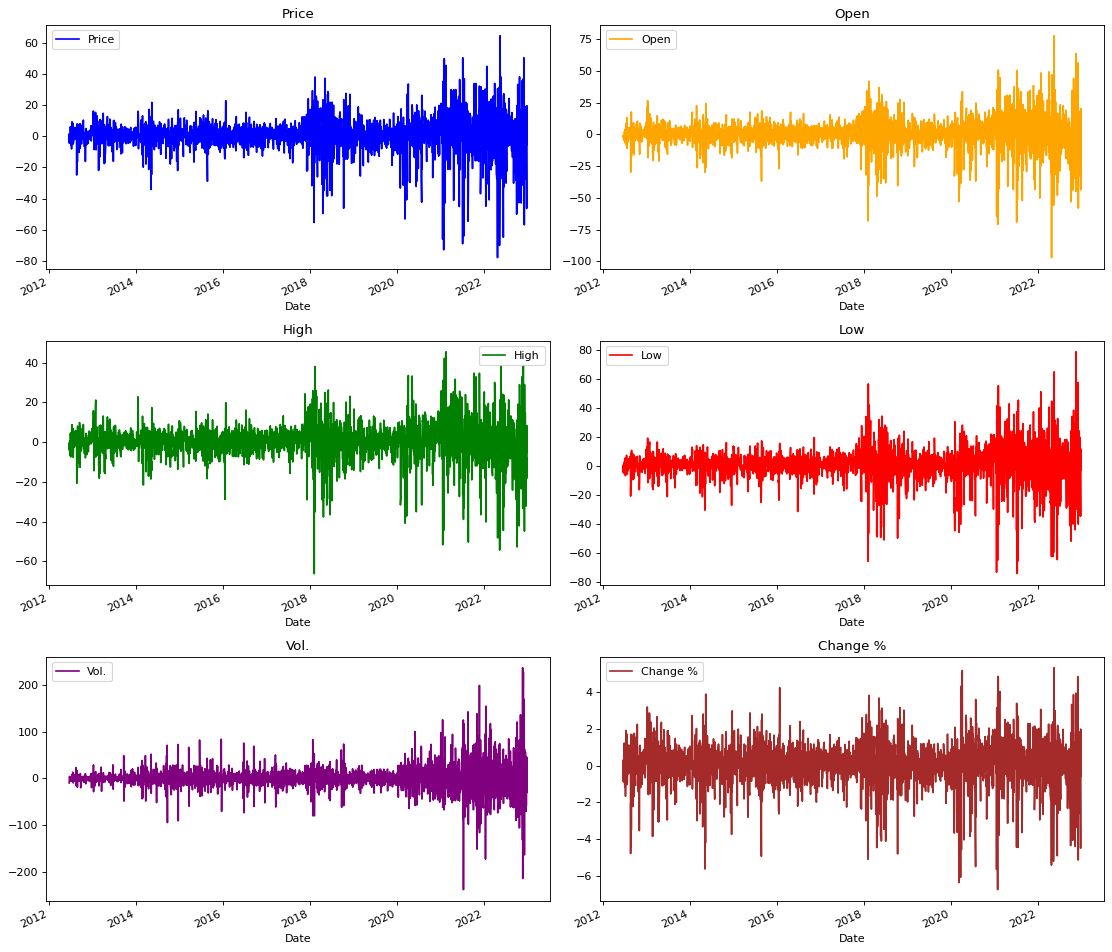

In [133]:
Visualize(df)

 H0: Xt does not granger causes Yt
 
 H1: Xt granger causes Yt

In [134]:
max_lags=12
y='Price'

In [135]:
df.columns

Index(['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

In [136]:
for y in df.columns:
    print('Causal test', y)
    for i in range(0,len(df.columns)):
        results=grangercausalitytests(df[[y,df.columns[i]]], max_lags, verbose=False)
        p_values=[round(results[i+1][0]['ssr_ftest'][1],4) for i in range(max_lags)]
        print('Column - {} : P_Values - {}'.format(df.columns[i],p_values))

Causal test Price
Column - Price : P_Values - [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Column - Open : P_Values - [0.5561, 0.9512, 0.8293, 0.3163, 0.5749, 0.0545, 0.1228, 0.0438, 0.2651, 0.2226, 0.1788, 0.006]
Column - High : P_Values - [0.1326, 0.0514, 0.0012, 0.0035, 0.0115, 0.0009, 0.0046, 0.0004, 0.0056, 0.0029, 0.0051, 0.0001]
Column - Low : P_Values - [0.4654, 0.0598, 0.0908, 0.1569, 0.2512, 0.2558, 0.0199, 0.0053, 0.0404, 0.0481, 0.0566, 0.0008]
Column - Vol. : P_Values - [0.1045, 0.0223, 0.0426, 0.0288, 0.0611, 0.0538, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Column - Change % : P_Values - [0.0424, 0.0175, 0.0169, 0.0016, 0.002, 0.0047, 0.0054, 0.0081, 0.0089, 0.0077, 0.013, 0.0178]
Causal test Open
Column - Price : P_Values - [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Column - Open : P_Values - [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Column - High : P_Values - [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Column - 

In [137]:
maxlag=12
test = 'ssr_ftest'
def grangers_causality_matrix(X_train, variables, test = 'ssr_ftest', verbose=False):
    dataset = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in dataset.columns:
        for r in dataset.index:
            test_result = grangercausalitytests(X_train[[r,c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: 
                print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.max(p_values)
            dataset.loc[r,c] = str(p_values)
    dataset.columns = [var + '_x' for var in variables]
    dataset.index = [var + '_y' for var in variables]
    return dataset
grangers_causality_matrix(df, variables = df.columns, test=test)


,Price_x,Open_x,High_x,Low_x,Vol._x,Change %_x
Price_y,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.5561, 0.9512, 0.8293, 0.3163, 0.5749, 0.054...","[0.1326, 0.0514, 0.0012, 0.0035, 0.0115, 0.000...","[0.4654, 0.0598, 0.0908, 0.1569, 0.2512, 0.255...","[0.1045, 0.0223, 0.0426, 0.0288, 0.0611, 0.053...","[0.0424, 0.0175, 0.0169, 0.0016, 0.002, 0.0047..."
Open_y,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
High_y,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
Low_y,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.1072, 0.0082, 0.0026, 0.0123, 0.0021, 0.008...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
Vol._y,"[0.0002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...."
Change %_y,"[0.0591, 0.0361, 0.0455, 0.005, 0.0057, 0.0122...","[0.3066, 0.4006, 0.361, 0.1666, 0.0814, 0.0391...","[0.2461, 0.4792, 0.8456, 0.6662, 0.5482, 0.216...","[0.594, 0.0246, 0.0134, 0.0183, 0.0295, 0.0346...","[0.0891, 0.073, 0.1817, 0.0946, 0.144, 0.104, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."


In [138]:
max_lags = 12
y = 'Price'
for i in range(0,len(df.columns)):
  results=grangercausalitytests(df[[y,df.columns[i]]], max_lags, verbose=False)
  p_values=[round(results[i+1][0]['ssr_ftest'][1],4) for i in range(max_lags)]
  print('Column - {} : P_Values - {}'.format(df.columns[i],p_values))

Column - Price : P_Values - [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Column - Open : P_Values - [0.5561, 0.9512, 0.8293, 0.3163, 0.5749, 0.0545, 0.1228, 0.0438, 0.2651, 0.2226, 0.1788, 0.006]
Column - High : P_Values - [0.1326, 0.0514, 0.0012, 0.0035, 0.0115, 0.0009, 0.0046, 0.0004, 0.0056, 0.0029, 0.0051, 0.0001]
Column - Low : P_Values - [0.4654, 0.0598, 0.0908, 0.1569, 0.2512, 0.2558, 0.0199, 0.0053, 0.0404, 0.0481, 0.0566, 0.0008]
Column - Vol. : P_Values - [0.1045, 0.0223, 0.0426, 0.0288, 0.0611, 0.0538, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Column - Change % : P_Values - [0.0424, 0.0175, 0.0169, 0.0016, 0.002, 0.0047, 0.0054, 0.0081, 0.0089, 0.0077, 0.013, 0.0178]


In [139]:
df

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2012-06-19,-4.139984,-1.250000,-3.949982,-3.620026,-9.880000,-0.81
2012-06-20,1.559998,-1.139984,-0.230011,-1.000000,-2.030000,0.31
2012-06-21,-3.520020,-2.380005,-2.529999,0.500000,2.580000,-0.69
2012-06-22,-4.369995,-0.880005,-3.630005,-5.119995,4.110001,-0.87
2012-06-25,-2.250000,-4.600006,-0.630005,-2.970001,-0.910000,-0.45
...,...,...,...,...,...,...
2022-12-26,-46.359985,-5.489990,-8.199951,-34.739990,45.379990,-4.48
2022-12-27,19.589966,-43.550049,-18.160034,-2.100037,-21.569992,1.98
2022-12-28,6.590027,20.320007,8.229980,11.450012,-30.400002,0.65


In [140]:
origin_df = origin_df[df.columns]
nobs = 6
df_train = origin_df[:-nobs]
df_test = origin_df[-nobs:]

nobs = len(df_test)

print(df_train.shape) 
print(df_test.shape)

(2629, 6)
(6, 6)


In [141]:
model = VAR(df)


/home/noing/anaconda3/envs/venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [142]:
model.select_order(20).summary()

,AIC,BIC,FPE,HQIC
0,20.69,20.70,9.650e+08,20.69
1,17.78,17.87,5.269e+07,17.81
2,17.28,17.46,3.209e+07,17.35
3,17.06,17.32,2.568e+07,17.15
4,16.87,17.20,2.111e+07,16.99
5,16.76,17.18*,1.904e+07,16.91
6,16.71,17.21,1.811e+07,16.89
7,16.63,17.21,1.663e+07,16.84
8,16.57,17.23,1.572e+07,16.81*
9,16.54,17.28,1.530e+07,16.81


In [143]:
model = VAR(df[int(len(df)*0.8):])
fitted_model = model.fit(maxlags=20, ic='aic')

/home/noing/anaconda3/envs/venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [144]:
print(fitted_model.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 02, May, 2023
Time:                     16:41:34
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                    23.5203
Nobs:                     520.000    HQIC:                   22.2365
Log likelihood:          -9735.62    FPE:                1.99123e+09
AIC:                      21.4097    Det(Omega_mle):     1.23621e+09
--------------------------------------------------------------------
Results for equation Price
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const              -0.056552         0.861471           -0.066           0.948
L1.Price           -0.472354         0.309579           -1.526           0.127
L1.Open             0.017140         0.191948            0.089      

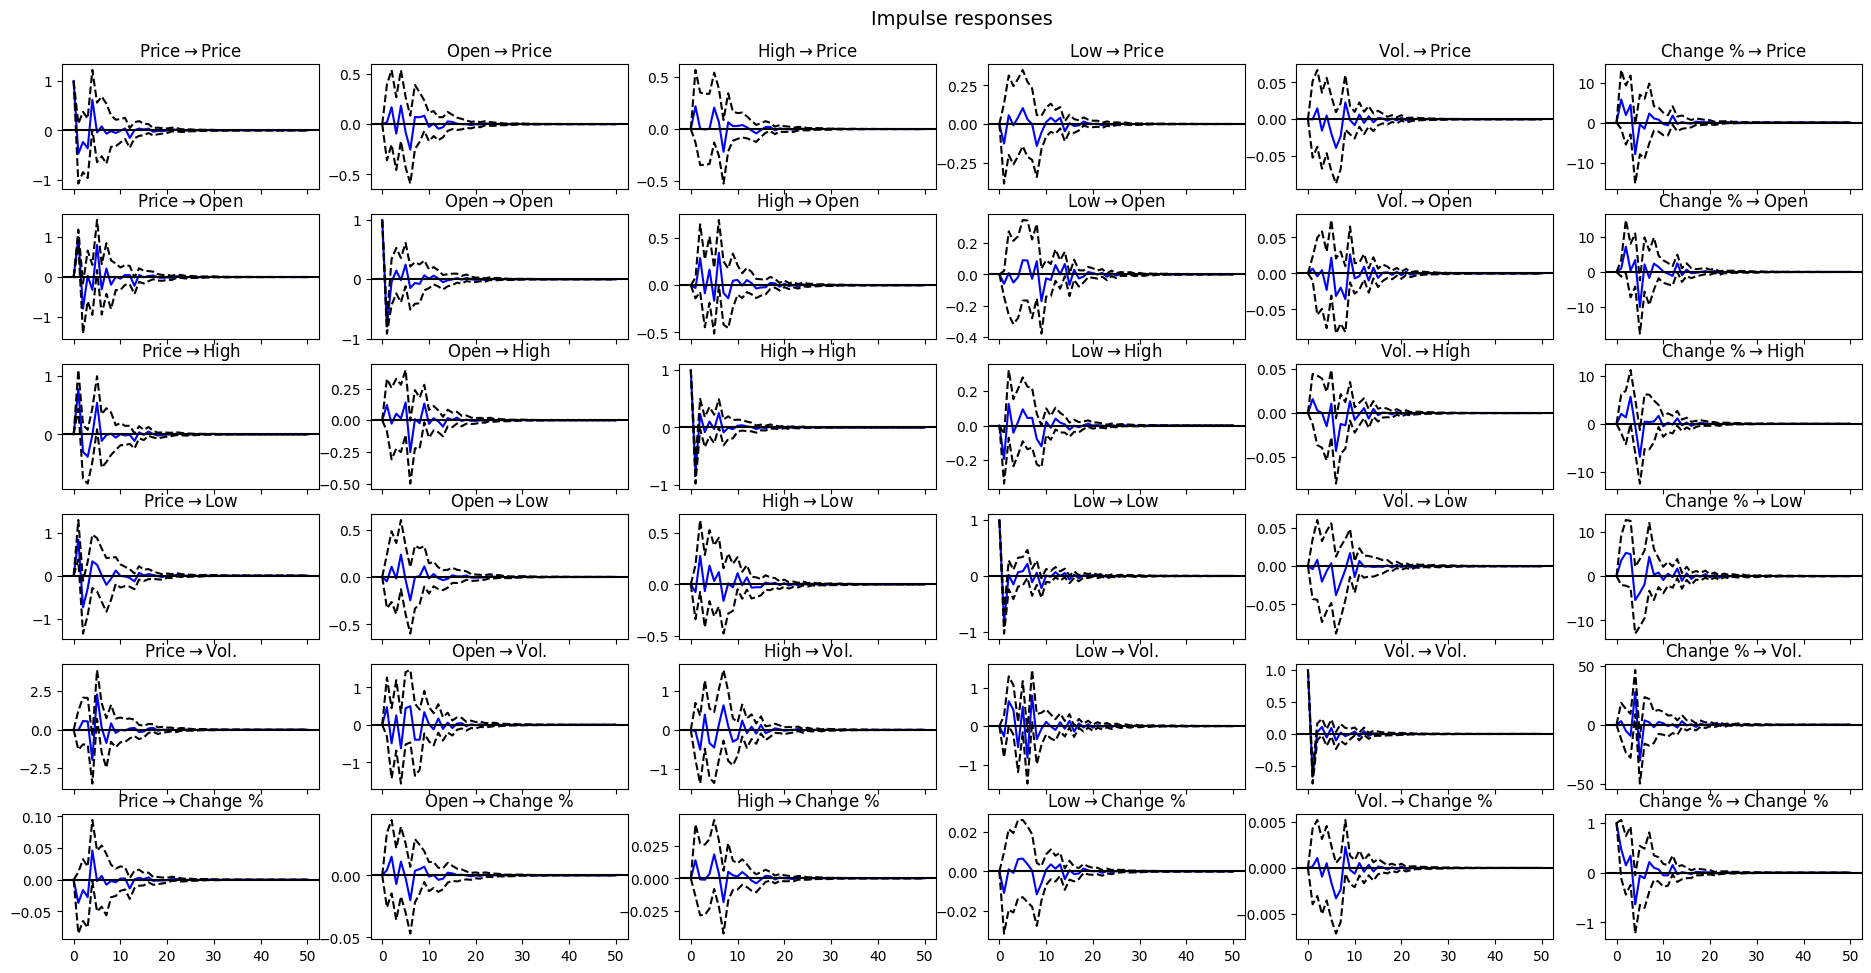

In [145]:
irf = fitted_model.irf(50)
irf.plot(figsize=(20,10))
plt.show()


In [146]:
def adjust(val, length= 6): return str(val).ljust(length)

Kiểm nghiệm Durbin Watson cho việc kiểm định tính tương quan chuỗi cho phần dư của mô hình 

In [147]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(fitted_model.resid)

for col, val in zip(df.columns, out):
    print(adjust(col), ':', round(val, 2))

Price  : 2.01
Open   : 2.07
High   : 2.0
Low    : 2.03
Vol.   : 2.01
Change % : 2.0


In [148]:
lag_order = fitted_model.k_ar
print(lag_order) 


7


In [149]:
import random
nobs = lag_order
# start_index = random.randint(lag_order+1, len(origin_df) - nobs-1)
start_index = len(origin_df) - lag_order
df_train = origin_df[:start_index]
df_test = origin_df[start_index:start_index+nobs]

nobs = len(df_test)

# Check size
print(df_train.shape) 
print(df_test.shape)

(2628, 6)
(7, 6)


In [150]:
# lag_order = fitted_model.k_ar
# print(lag_order)  #> 5

# Input data for forecasting
# forecast_input = df.values[-lag_order:]
forecast_input = df.values[(start_index - lag_order - 1):start_index - 1]
forecast_input

array([[ 1.9010010e+01, -3.2640015e+01, -1.7009888e+01, -9.0500488e+00,
         2.2000000e+01,  1.8300000e+00],
       [-2.6000977e-01,  1.8130005e+01,  1.4589966e+01,  2.3880005e+01,
        -4.9389999e+01, -2.0000000e-02],
       [ 1.1909912e+01, -9.5996094e-01,  5.0100098e+00,  3.2399902e+00,
         5.6089996e+01,  1.1300000e+00],
       [-4.0100098e+00,  5.7799072e+00,  1.2399902e+00,  3.3900146e+00,
         9.9000549e-01, -3.8000000e-01],
       [-1.3849976e+01,  2.1400146e+00,  4.2800293e+00, -8.6600342e+00,
         8.7800140e+00, -1.3000000e+00],
       [-2.0429932e+01, -1.5549927e+01, -3.2160034e+01, -3.4559998e+01,
         2.5089996e+01, -1.9500000e+00],
       [ 3.3099365e+00, -7.1199951e+00, -7.7399902e+00, -3.7599487e+00,
        -7.0670013e+01,  3.1999999e-01]], dtype=float32)

In [151]:
df[(start_index - lag_order-1):start_index-1]

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2022-12-13,19.010010,-32.640015,-17.009888,-9.050049,22.000000,1.83
2022-12-14,-0.260010,18.130005,14.589966,23.880005,-49.389999,-0.02
2022-12-15,11.909912,-0.959961,5.010010,3.239990,56.089996,1.13
2022-12-16,-4.010010,5.779907,1.239990,3.390015,0.990005,-0.38
2022-12-19,-13.849976,2.140015,4.280029,-8.660034,8.780014,-1.30
2022-12-20,-20.429932,-15.549927,-32.160034,-34.559998,25.089996,-1.95
2022-12-21,3.309937,-7.119995,-7.739990,-3.759949,-70.670013,0.32


In [152]:
df_test

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2022-12-22,1038.339966,1033.719971,1048.839966,1031.290039,188.500000,0.51
2022-12-23,1034.130005,1037.910034,1041.369995,1022.510010,129.850006,-0.41
2022-12-26,987.770020,1032.420044,1033.170044,987.770020,175.229996,-4.48
2022-12-27,1007.359985,988.869995,1015.010010,985.669983,153.660004,1.98
2022-12-28,1013.950012,1009.190002,1023.239990,997.119995,123.260002,0.65
2022-12-29,1008.299988,1013.950012,1022.150024,1008.299988,121.029999,-0.56
2022-12-30,1005.190002,1016.710022,1017.450012,1005.190002,95.620003,-0.31


In [153]:
len(df_test)

7

In [154]:
fc = fitted_model.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df_test.index, columns=df.columns + '_1d')
df_forecast

,Price_1d,Open_1d,High_1d,Low_1d,Vol._1d,Change %_1d
Date,,,,,,
2022-12-22,3.411064,-6.448313,9.963938,10.296152,30.622018,0.405407
2022-12-23,0.812602,0.451208,-2.420113,-0.887460,-12.020139,0.208834
2022-12-26,1.882485,2.442023,2.829326,5.621775,-2.668808,0.132528
2022-12-27,-4.139797,2.884099,-1.072411,-2.503633,12.685024,-0.402990
2022-12-28,-7.010389,-3.881048,-4.487224,-6.526194,5.722917,-0.557873
2022-12-29,-2.462815,-6.390149,-5.280070,-5.016683,3.460666,-0.197546
2022-12-30,5.828231,-0.798860,0.946873,2.102000,-22.392792,0.494837


In [155]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [156]:
df_train['Price'].iloc[-1]

1033.1

In [157]:
df_results = invert_transformation(df_train, df_forecast, second_diff=False)
df_results

,Price_1d,Open_1d,High_1d,Low_1d,Vol._1d,Change %_1d,Price_forecast,Open_forecast,High_forecast,Low_forecast,Vol._forecast,Change %_forecast
Date,,,,,,,,,,,,
2022-12-22,3.411064,-6.448313,9.963938,10.296152,30.622018,0.405407,1036.511039,1034.601736,1051.613963,1022.196176,243.432016,0.725407
2022-12-23,0.812602,0.451208,-2.420113,-0.887460,-12.020139,0.208834,1037.323641,1035.052944,1049.193850,1021.308716,231.411877,0.934241
2022-12-26,1.882485,2.442023,2.829326,5.621775,-2.668808,0.132528,1039.206126,1037.494967,1052.023176,1026.930491,228.743069,1.066769
2022-12-27,-4.139797,2.884099,-1.072411,-2.503633,12.685024,-0.402990,1035.066329,1040.379066,1050.950765,1024.426858,241.428093,0.663779
2022-12-28,-7.010389,-3.881048,-4.487224,-6.526194,5.722917,-0.557873,1028.055940,1036.498018,1046.463541,1017.900665,247.151010,0.105906
2022-12-29,-2.462815,-6.390149,-5.280070,-5.016683,3.460666,-0.197546,1025.593125,1030.107869,1041.183471,1012.883981,250.611675,-0.091640
2022-12-30,5.828231,-0.798860,0.946873,2.102000,-22.392792,0.494837,1031.421356,1029.309009,1042.130344,1014.985981,228.218883,0.403197


In [158]:
df_test

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2022-12-22,1038.339966,1033.719971,1048.839966,1031.290039,188.500000,0.51
2022-12-23,1034.130005,1037.910034,1041.369995,1022.510010,129.850006,-0.41
2022-12-26,987.770020,1032.420044,1033.170044,987.770020,175.229996,-4.48
2022-12-27,1007.359985,988.869995,1015.010010,985.669983,153.660004,1.98
2022-12-28,1013.950012,1009.190002,1023.239990,997.119995,123.260002,0.65
2022-12-29,1008.299988,1013.950012,1022.150024,1008.299988,121.029999,-0.56
2022-12-30,1005.190002,1016.710022,1017.450012,1005.190002,95.620003,-0.31


In [159]:
df_test_1 = df_test.copy()

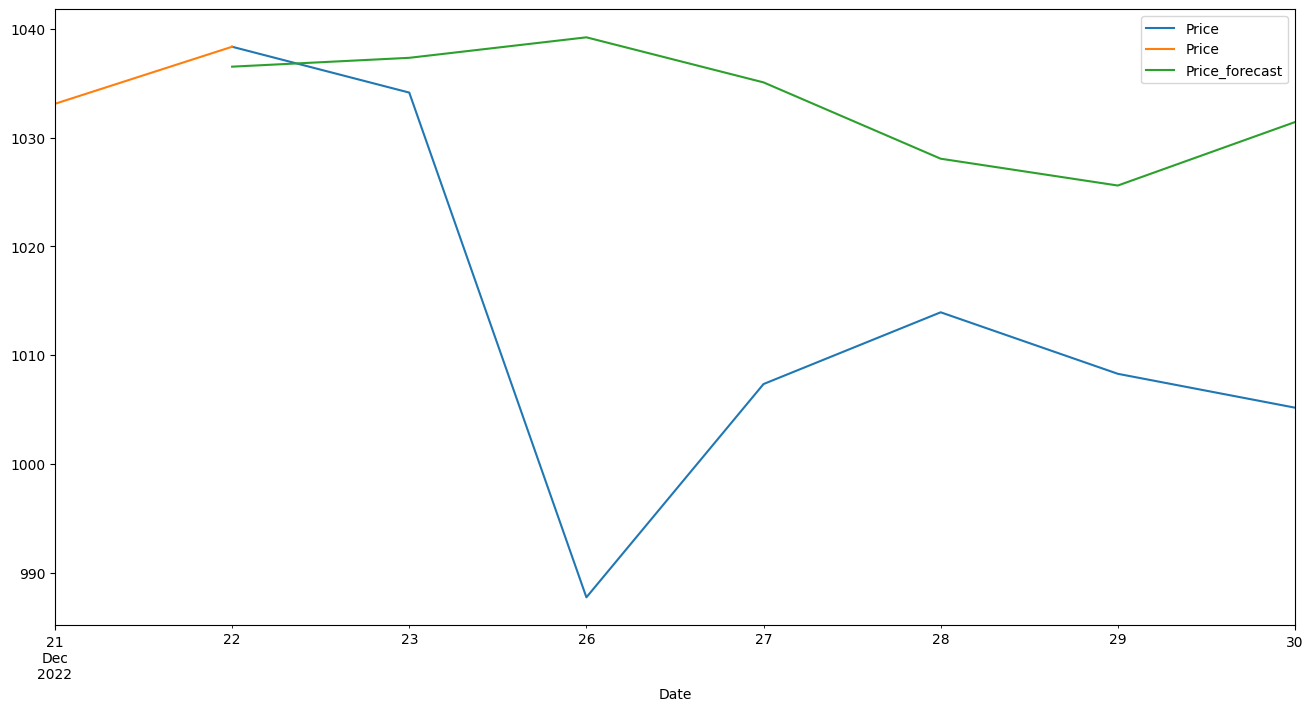

In [160]:
col = 'Price'
df_test['Price'][-nobs:].plot(legend=True)
origin_df['Price'][start_index-1:start_index+1].plot(legend=True)

df_results[col+'_forecast'].plot(legend=True).autoscale(axis='x',tight=True)
plt.show()

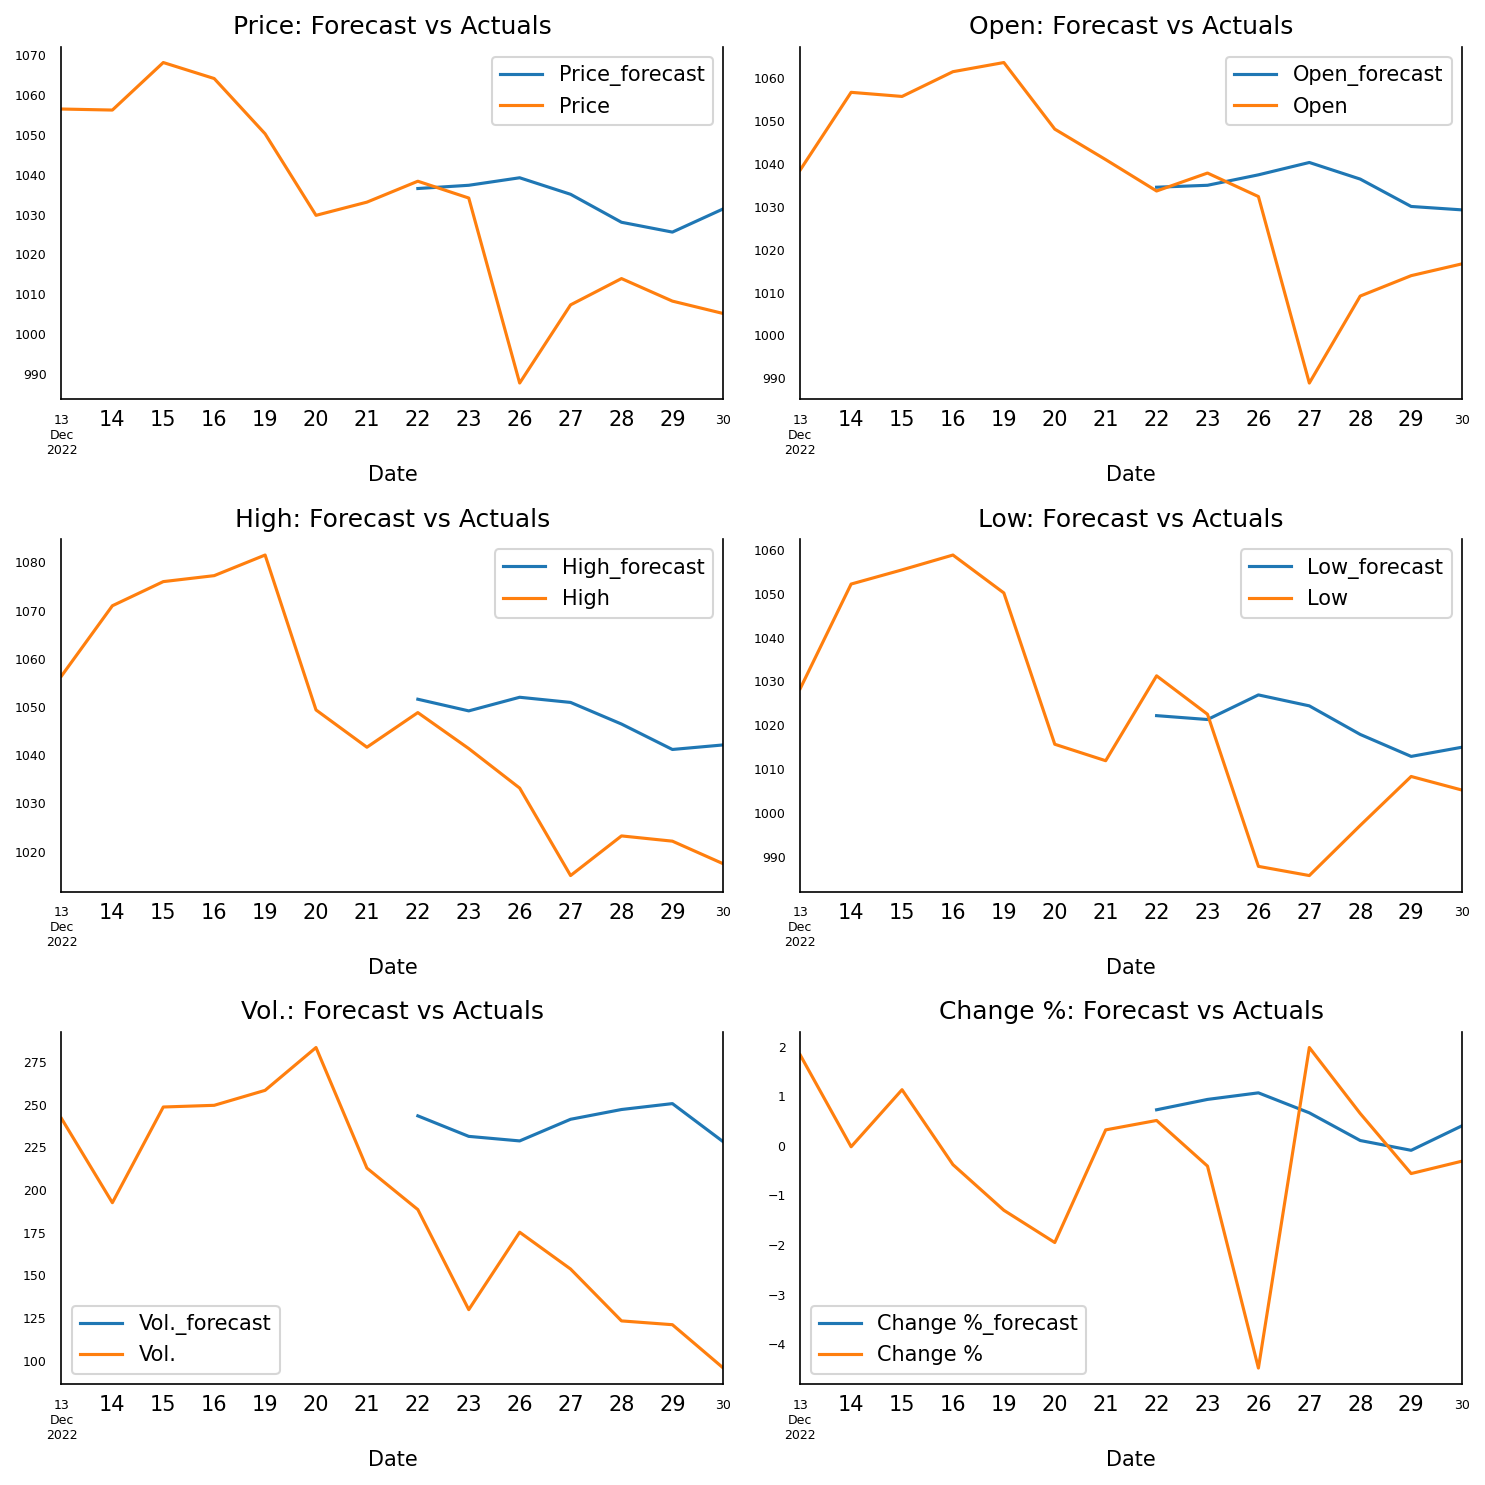

In [161]:
fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    origin_df[col][start_index-lag_order:start_index+nobs].plot(legend=True, ax=ax)
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout()

In [162]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})



In [163]:
start_index = 34
pred_df = pd.DataFrame(columns=VN30_df.columns)
for start_index in range(lag_order+1, len(df)-lag_order):
    forecast_input = df.values[(start_index - lag_order-1):start_index-1]

    fc = fitted_model.forecast(y=forecast_input, steps=1)
    df_forecast = pd.DataFrame(fc, index=origin_df[start_index:start_index+1].index, columns=df.columns + '_1d')

    df_results = invert_transformation(origin_df[(start_index - lag_order - 1):start_index], df_forecast, second_diff=False)
    pred_df = pd.concat([pred_df, df_results[[col+'_forecast' for col in VN30_df.columns]]])

In [164]:
test_start_date = pred_df.index.min()

In [165]:
test_end_date = pred_df.index.max()

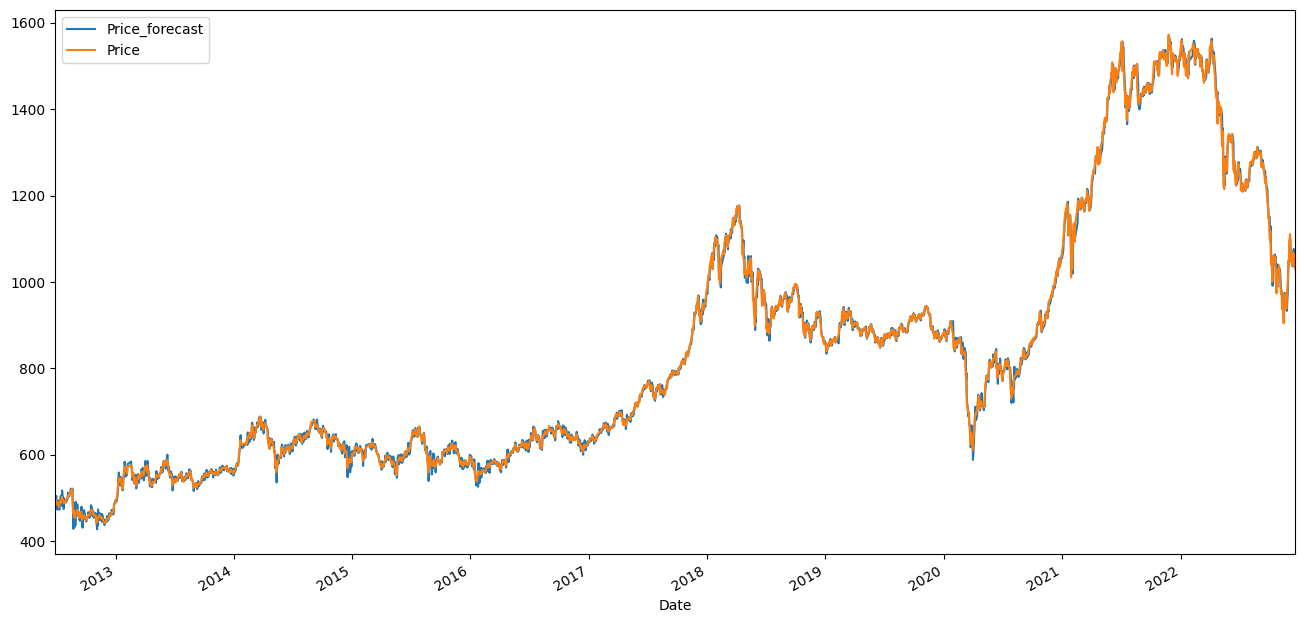

In [166]:
pred_df[test_start_date:test_end_date]['Price'+'_forecast'].plot(legend=True).autoscale(axis='x',tight=True)
origin_df[test_start_date:test_end_date]['Price'].plot(legend=True).autoscale(axis='x',tight=True)
plt.show()

In [167]:
df_len = len(origin_df)
test_range = df_len - int(0.8*df_len)

In [168]:
test_range

527

In [169]:
pred_df[-test_range:]['Price'+'_forecast']

2020-11-12     919.044120
2020-11-13     920.468862
2020-11-16     933.058980
2020-11-17     917.037711
2020-11-18     936.796488
                 ...     
2022-12-14    1060.888180
2022-12-15    1059.087589
2022-12-16    1076.255857
2022-12-19    1054.833703
2022-12-20    1054.415294
Name: Price_forecast, Length: 527, dtype: float64

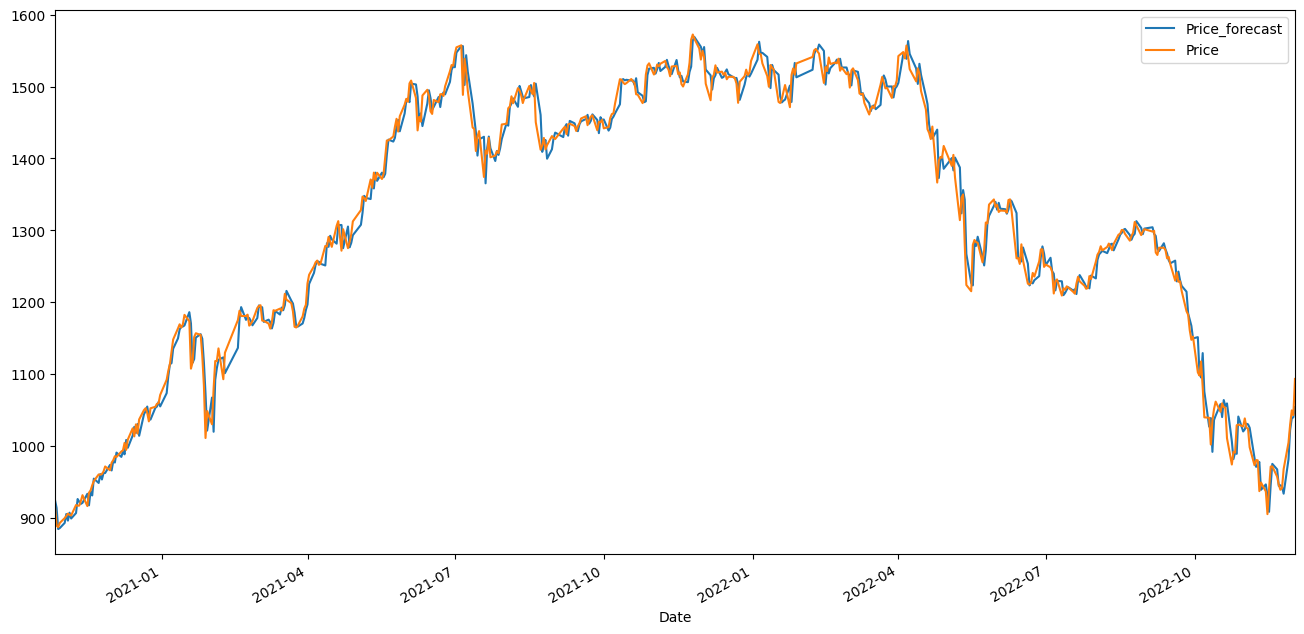

In [170]:
pred_df['2020-10-27':'2022-12-02']['Price'+'_forecast'].plot(legend=True).autoscale(axis='x',tight=True)
origin_df['2020-10-27':'2022-12-02']['Price'].plot(legend=True).autoscale(axis='x',tight=True)
plt.show()

In [171]:
print('\nForecast Accuracy of: VN Index')
accuracy_prod = forecast_accuracy(pred_df['Price_forecast'].values, 
origin_df[lag_order+1: len(df)-lag_order]['Price'].values)
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))


Forecast Accuracy of: VN Index
mape   :  0.0101
me     :  -0.1325
mae    :  8.2158
mpe    :  -0.0001
rmse   :  11.9524
corr   :  0.9992
minmax :  0.01


In [172]:
print('\nForecast Accuracy of: VN Index')
accuracy_prod = forecast_accuracy(
    pred_df['2020-10-27':'2022-12-02']['Price_forecast'].values, 
    origin_df['2020-10-27':'2022-12-02']['Price'].values)
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))


Forecast Accuracy of: VN Index
mape   :  0.0103
me     :  -0.257
mae    :  13.106
mpe    :  -0.0002
rmse   :  18.1894
corr   :  0.9956
minmax :  0.0102
